[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91784\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91784\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91784\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       506
           1       0.82      0.88      0.85       494

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

Accuracy: 0.844
ROC AUC: 0.8444816053511706

Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       506
           1       0.82      0.82      0.82       494

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

Accuracy: 0.82
ROC AUC: 0.8199500728104848

Model: SVM
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       506
           1       0.82      0.88      0.85       494

    accuracy                     

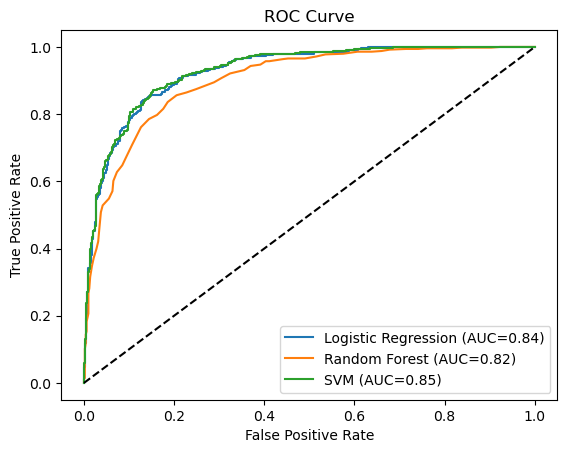

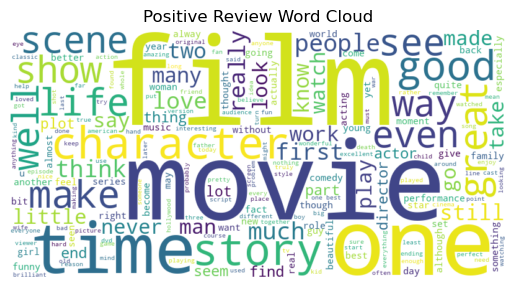

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

df = pd.read_csv("IMDB Dataset.csv")
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df = df.sample(5000, random_state=42).reset_index(drop=True)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))

    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_pred):.2f})')

evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")
evaluate(RandomForestClassifier(n_estimators=100), "Random Forest")
evaluate(SVC(probability=True), "SVM")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

pos_text = " ".join(df[df['label'] == 1]['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Review Word Cloud")
plt.axis('off')
plt.show()


In [4]:
from transformers import pipeline
sentiment_pipe = pipeline("sentiment-analysis")

print(sentiment_pipe("This movie was absolutely amazing!"))
print(sentiment_pipe("This was a total waste of time."))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\91784\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91784\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998781681060791}]
[{'label': 'NEGATIVE', 'score': 0.9998000264167786}]
